In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix


In [3]:
df=pd.read_csv(r'/content/sample_data/mushrooms.csv')
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2518,e,f,s,w,f,n,f,w,b,n,...,s,w,w,p,w,o,e,n,s,g
4130,p,x,y,y,f,f,f,c,b,g,...,k,b,b,p,w,o,l,h,v,g
2070,e,f,f,g,t,n,f,c,b,n,...,s,g,p,p,w,o,p,k,y,d
7149,p,f,s,n,f,s,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
7072,p,f,y,e,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d


# Preprocessing


In [4]:
mappings = list()

encoder = LabelEncoder()

for column in range(len(df.columns)):
    df[df.columns[column]] = encoder.fit_transform(df[df.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


FROM EDA we get to know that Veil-type has only one value so we dropped that columns .

In [6]:
df.drop(columns=['veil-type'],inplace=True)

In [7]:
df.sample()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4281,1,5,0,3,0,2,1,0,0,3,...,1,1,0,6,2,1,2,1,5,4


In [8]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [9]:
X=df.drop('class',axis=1)
Y=df['class']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Standardization

In [12]:
scaler=StandardScaler()

In [13]:
X_train=scaler.fit_transform(X_train)

In [14]:
X_test=scaler.fit_transform(X_test)

# Model Creation

#
LogisticRegression

In [16]:
logi=LogisticRegression()

In [17]:
logi.fit(X_train,y_train)

LogisticRegression()

In [18]:
logi.score(X_train,y_train)

0.9572241883366672

In [19]:
logi.score(X_test,y_test)

0.9556923076923077

In [20]:
logi_pred=logi.predict(X_test)

In [21]:
confusion_matrix(logi_pred,y_test)

array([[795,  24],
       [ 48, 758]])

# DesicionTree Classifier

In [22]:
clf=DecisionTreeClassifier()

In [23]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

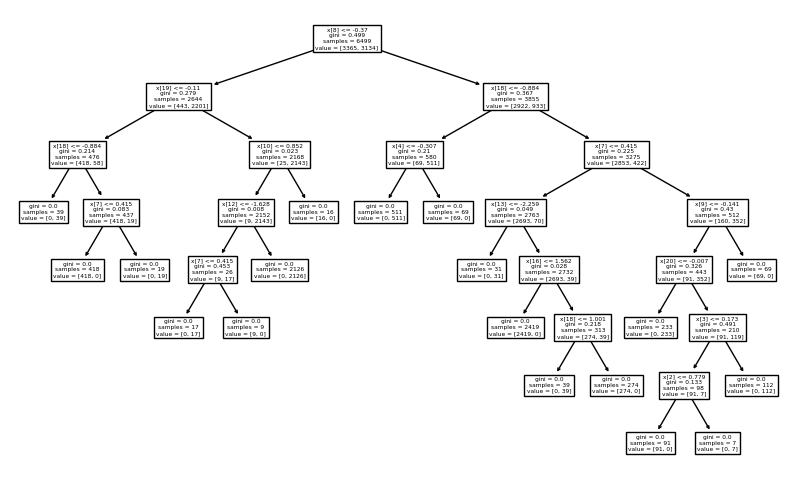

In [24]:
plt.figure(figsize=(10,6))
plot_tree(clf)
plt.show()

In [25]:
clf.score(X_test,y_test)

1.0

In [26]:
confusion_matrix(clf.predict(X_test),y_test)

array([[843,   0],
       [  0, 782]])

# RandomForest Classifier

In [27]:
RCLF=RandomForestClassifier()

In [28]:
RCLF.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
confusion_matrix(RCLF.predict(X_test),y_test)

array([[843,   0],
       [  0, 782]])

# Support Vector Classifier

In [30]:
SVClf=SVC()

In [31]:
SVClf.fit(X_train,y_train)

SVC()

In [32]:
confusion_matrix(SVClf.predict(X_test),y_test)

array([[843,   0],
       [  0, 782]])

In [ ]:
# model Evaluation


In [33]:
def Model_eval(models,X_test,Y_test):
  li=[]
  for model in models:
    tn,fp,fn,tp=confusion_matrix(Y_test,model.predict(X_test)).ravel()
    accuracy=round((tp+tn)/(tp+fn+fp+fn),2)
    precision=round(tp/(tp+fp),2)
    recall=round(tp/(tp+fn),2)
    specificity=round(tn/(fp+tn),2)
    li.append([f'{model}',tn,fp,fn,tp,accuracy,precision,recall,specificity])
  return pd.DataFrame(li,columns=['models','tn','fp','fn','tp','accuracy','precision','recall','specificity'])

x=Model_eval([logi,clf,RCLF,SVClf],X_test,y_test)
x

,models,tn,fp,fn,tp,accuracy,precision,recall,specificity
0,LogisticRegression(),795,48,24,758,1.82,0.94,0.97,0.94
1,DecisionTreeClassifier(),843,0,0,782,2.08,1.00,1.00,1.00
2,RandomForestClassifier(),843,0,0,782,2.08,1.00,1.00,1.00
3,SVC(),843,0,0,782,2.08,1.00,1.00,1.00


RandomForest , Desicion Tree & Support Vector Classifiers give us 100% accuracy where we can orserve Logistics Regression 95% accuracy . We can choose SVC for our project because Decision tree models are High Bias in Nature ,also SVC models works well with multiple features .

#ROC/AUC Curve For SVC

In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from plotly import express as px

In [36]:
fpr,tpr,thresh=roc_curve(y_test,SVClf.predict(X_test))

In [37]:
roc_df=pd.DataFrame(zip(fpr,tpr,thresh),columns=['FPR','TPR',"Thresh"])

In [38]:
roc_df

,FPR,TPR,Thresh
0,0.0,0.0,2
1,0.0,1.0,1
2,1.0,1.0,0


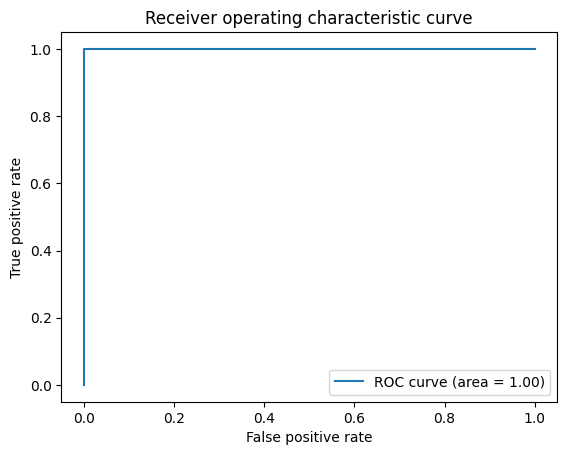

In [48]:
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic curve')
plt.legend()
plt.show()

In [44]:
logi_pred=logi.predict(X_test)

1.0